<a href="https://colab.research.google.com/github/RewinaB/Deep-Learning-Projects/blob/main/Culture_Fit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Culture Fit Prediction
This notebook demonstrates how we can use ML models to predict culture fit using  HR data.

In [1]:
# 1. Install required packages
!pip install -q xgboost scikit-learn pandas matplotlib seaborn

In [2]:
# 2. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

**Simulated data where culture fit is defined**

In [3]:
# 3. Load the dataset
data = pd.read_csv('/simulated_culture_fit_data.csv')
data.head()

,years_experience,agreeableness,conscientiousness,openness,extraversion,neuroticism,collaboration_score,innovation_preference,remote_preference,job_type_preference,culture_fit
0,5.993428,1.672946,2.250625,2.378693,3.744304,4.405509,1.890613,5,0,non-technical,0
1,4.723471,1.759739,1.712932,2.399714,1.089291,1.941760,2.882227,4,0,non-technical,0
2,6.295377,2.842849,4.436729,3.172050,1.216158,3.398565,4.690585,5,1,non-technical,0
3,8.046060,2.145119,2.614091,2.534008,3.130711,4.423525,2.189493,2,0,non-technical,0
4,4.531693,1.989852,2.594175,1.005703,1.764142,2.634904,4.622314,2,1,non-technical,0


We are defining "culture fit" as:

* High agreeableness

* High collaboration score

* Low neuroticism

Which means:

Any model that picks up on this exact rule will perform extremely well, especially decision tree-based models like Random Forest and XGBoost.

y (Target variable): culture_fit — a binary variable indicating whether the candidate was assessed to be a "fit" culturally (1 = fit, 0 = not a fit). This could be derived from:

Post-hire manager feedback

Retention or engagement score after X months

Peer rating surveys

What are the features (X)?

Feature	Type	Description
* years_experience	Continuous
* Years of total work experience
* agreeableness	Continuous	Big Five trait
* conscientiousness	Continuous	Big Five trait
* openness	Continuous	Big Five trait
* extraversion	Continuous	Big Five trait
* neuroticism	Continuous	Big Five trait
* collaboration_score	Continuous	Score for collaboration (1–5)
* innovation_preference	Ordinal
* Preference for innovation
* remote_preference	Binary	Likes remote work? (0/1)
* job_type_preference	Categorical	Encoded to numeric internally

These were processed, scaled, and used as inputs (X) to predict culture_fit

**If Culture Fit is not clearly defined-use Unsupervised learning**

* 1. Use clustering algorithms (e.g., K-Means, DBSCAN) to identify latent patterns in employee profiles.

You might find segments of employees with high engagement or low attrition who share similar traits → emergent definition of culture fit.

* 2. SHAP / Feature Importance
Even without a strong definition, train a model on proxy outcomes (e.g., retention, engagement, promotion likelihood).

Then use SHAP values or permutation importance to identify:
Which features drive predictions most
Whether some traits unfairly influence "fit"

* 3.Exploratory Data Analysis (EDA) such as:
-Correlation matrix
-PCA (to visualize personality trait clusters)
-Decision trees (to derive interpretable if-then rules)

In [4]:
# 4. Encode categorical variables
data = pd.get_dummies(data, columns=['job_type_preference'], drop_first=True)

In [5]:
# 5. Split features and labels
X = data.drop(columns=['culture_fit'])
y = data['culture_fit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 6. Train and evaluate models
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression")
print(classification_report(y_test, lr.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       943
           1       0.81      0.61      0.70        57

    accuracy                           0.97      1000
   macro avg       0.90      0.80      0.84      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC: 0.9831631039422521


In [7]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest")
print(classification_report(y_test, rf.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       1.00      0.96      0.98        57

    accuracy                           1.00      1000
   macro avg       1.00      0.98      0.99      1000
weighted avg       1.00      1.00      1.00      1000

ROC AUC: 1.0


In [8]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
print("\nXGBoost")
print(classification_report(y_test, xgb.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       1.00      0.98      0.99        57

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000

ROC AUC: 1.0


All these models are performing well on this simulated data. This is because the original data generation logic created clear linear patterns (i.e.,  if agreeableness > 3.5 AND collaboration_score > 3.5 → culture_fit = 1). This kind of rule-based logic leads to overly clean data that models can easily fit, leading to artificially high accuracy and AUC scores.

I will create add Gaussian noise and probabilistic labels that mimics real world HR situations below.

**Un-supervised methods for Culture-Fit Prediction**

In [9]:
df = pd.read_csv('/simulated_culture_fit_data _Gaussian.csv')
df.head()

,cognitive_score,communication_skill,teamwork,independence,adaptability,industry_experience,education_level,department,culture_fit
0,107.450712,4.399355,2.324822,1.092192,2.136506,7,Master,HR,1
1,97.926035,3.924634,2.855481,2.139615,2.968797,0,Master,Marketing,0
2,109.715328,3.059630,2.207580,2.586394,3.018017,7,Bachelor,Marketing,1
3,122.845448,2.353063,2.692038,4.887688,3.472630,5,Bachelor,Marketing,1
4,96.487699,3.698223,1.106385,3.556553,1.633142,3,Bachelor,Marketing,1


In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare features (excluding the label for unsupervised learning)
X_unsupervised = df.drop(columns=['culture_fit'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X_unsupervised, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)



**K Means**
Divides data into k clusters such that each data point belongs to the cluster with the nearest mean (centroid).

Assumes clusters are spherical and relatively balanced.

Can reveal whether there are distinct types of employees based on features like department, work habits, or overtime that correlate with culture fit.

In [11]:
# Step 2: Run 3 unsupervised clustering algorithms

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
ari_kmeans = adjusted_rand_score(df['culture_fit'], labels_kmeans)



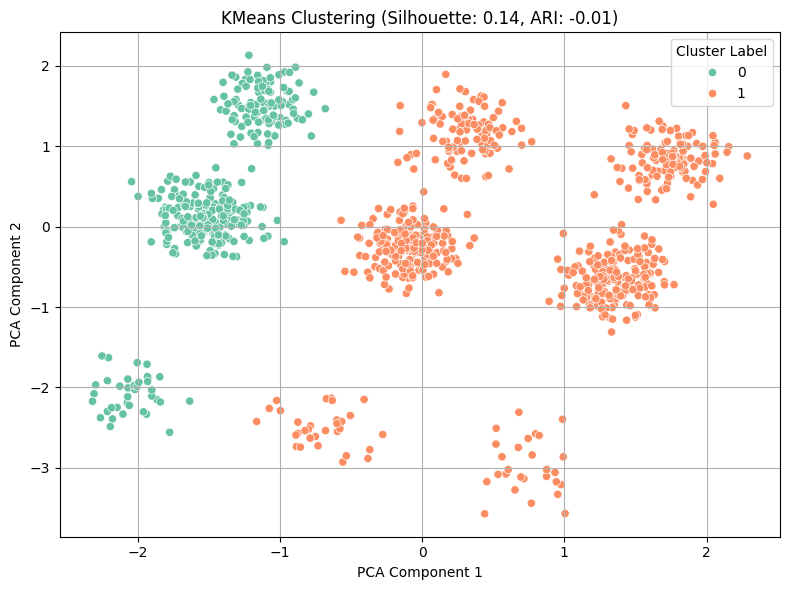

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set2')
plt.title(f'KMeans Clustering (Silhouette: {sil_kmeans:.2f}, ARI: {ari_kmeans:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()


**DBSCAN**
Groups data based on density of data points (not distance).

Identifies core points, border points, and outliers/noise.

Does not require number of clusters to be specified in advance.

What it tells us:

Useful when you expect some people to not belong to any clear group (e.g., misfits or outliers).

In [13]:

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)
# Only compute silhouette score if clusters > 1
sil_dbscan = silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
ari_dbscan = adjusted_rand_score(df['culture_fit'], labels_dbscan)


**Agglomerative Hierarchical Clustering**
Starts with each data point as its own cluster, then merges the closest clusters until a desired number remains.

Doesn’t assume any particular shape.

What it tells us:

Shows nested cluster relationships, which can help identify subgroups with similar patterns.

In [14]:

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_scaled)
sil_agglo = silhouette_score(X_scaled, labels_agglo)
ari_agglo = adjusted_rand_score(df['culture_fit'], labels_agglo)


In [17]:

# : Collect and return results
results = pd.DataFrame({
    'Method': ['KMeans', 'DBSCAN', 'Agglomerative'],
    'Silhouette Score': [sil_kmeans, sil_dbscan, sil_agglo],
    'Adjusted Rand Index (vs. culture_fit)': [ari_kmeans, ari_dbscan, ari_agglo]
})
print(results)



          Method  Silhouette Score  Adjusted Rand Index (vs. culture_fit)
0         KMeans          0.137249                              -0.005741
1         DBSCAN         -0.134538                              -0.000245
2  Agglomerative          0.119375                               0.001805


In [18]:
# Sort by silhouette score
results.sort_values(by='Silhouette Score', ascending=False)


,Method,Silhouette Score,Adjusted Rand Index (vs. culture_fit)
0,KMeans,0.137249,-0.005741
2,Agglomerative,0.119375,0.001805
1,DBSCAN,-0.134538,-0.000245


**Silhouette Score**
Ranges from -1 to +1

Measures how well-separated clusters are.

Close to +1: Well-separated, dense clusters.

Close to 0: Overlapping clusters or unclear structure.

Negative: Points might be in the wrong cluster.

🔹 Interpretation:

KMeans (0.137) and Agglomerative (0.119) indicate very weak clustering structure.

DBSCAN (-0.135) suggests poor separation, possibly noise or misclassified points.

**Correlations between features and culture fit**

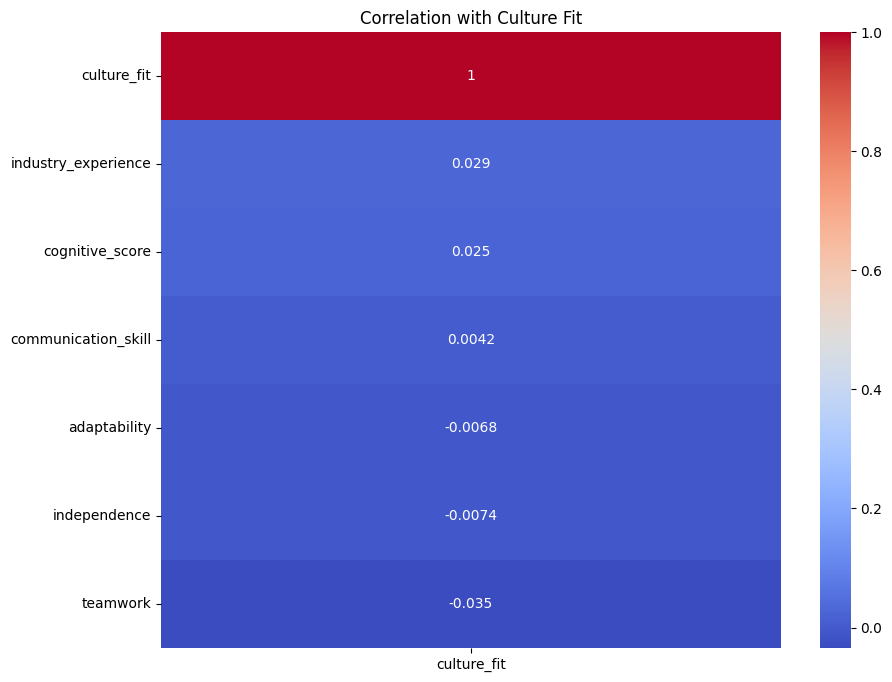

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add culture_fit if not already included in your features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['culture_fit']].sort_values(by='culture_fit', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Culture Fit')
plt.show()


**LR for feature importance**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Split into features and target
X = df.drop(columns=['culture_fit'])  # Drop target
y = df['culture_fit']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['education_level', 'department'], drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Feature importance (coefficients)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(importance_df)

                  Feature  Coefficient
5     industry_experience     0.082852
6  education_level_Master    -0.074448
1     communication_skill     0.066485
9         department_Tech     0.062631
2                teamwork    -0.053237
0         cognitive_score     0.044236
4            adaptability     0.043074
3            independence     0.021432
7     education_level_PhD    -0.017157
8    department_Marketing    -0.010634


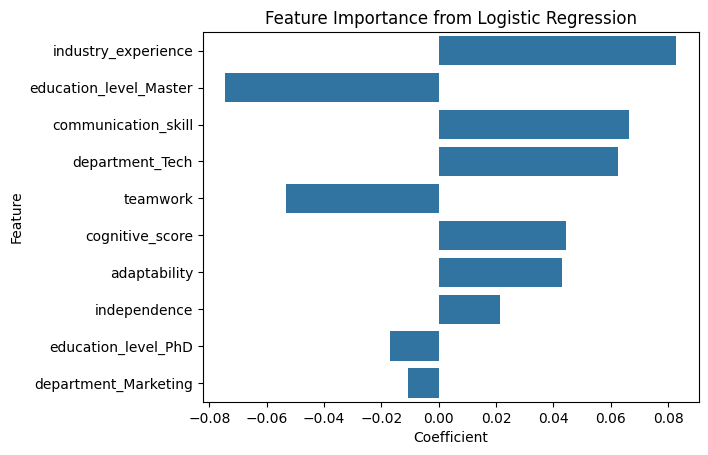

In [22]:
sns.barplot(data=importance_df, x='Coefficient', y='Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()


* industry_experience	+0.0829	Strongest positive predictor — candidates with more industry experience are more likely to be rated as a culture fit.

* education_level_Master	–0.0744	Surprisingly, candidates with a Master's degree are slightly less likely to be culture fits (relative to baseline — likely Bachelor’s).

* communication_skill	+0.0665	Good communication skills improve chances of culture fit — makes intuitive sense.

* department_Tech	+0.0626	Tech employees are more likely to be considered culture fits than other departments.

* teamwork	–0.0532	Unexpected — could suggest overly collaborative people are not fitting into a more independent culture. May also be multicollinearity or noise.

* cognitive_score	+0.0442	Higher cognitive test scores slightly increase likelihood of culture fit.

* adaptability	+0.0431	Predictably, being adaptable is positively associated with culture fit.

* independence	+0.0214	Weak predictor, but still positive.

* education_level_PhD	–0.0172	Slightly negative — may indicate overqualification or misfit in certain work environments.